<a href="https://colab.research.google.com/github/DongHyukShin93/BigData/blob/main/210614_03_%EC%9A%B8%EB%A6%89%EB%8F%84_%ED%9E%88%EC%8A%A4%ED%86%A0%EA%B7%B8%EB%9E%A8_%EC%83%81%EC%9E%90_%EA%B7%B8%EB%A6%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

한글 깨짐 처리


In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


1) 히스토그램을 활용한 최고기온, 최저 기온, 평균기온 분포 확인하기

1-1) 울릉도의 최고기온 히스토그램

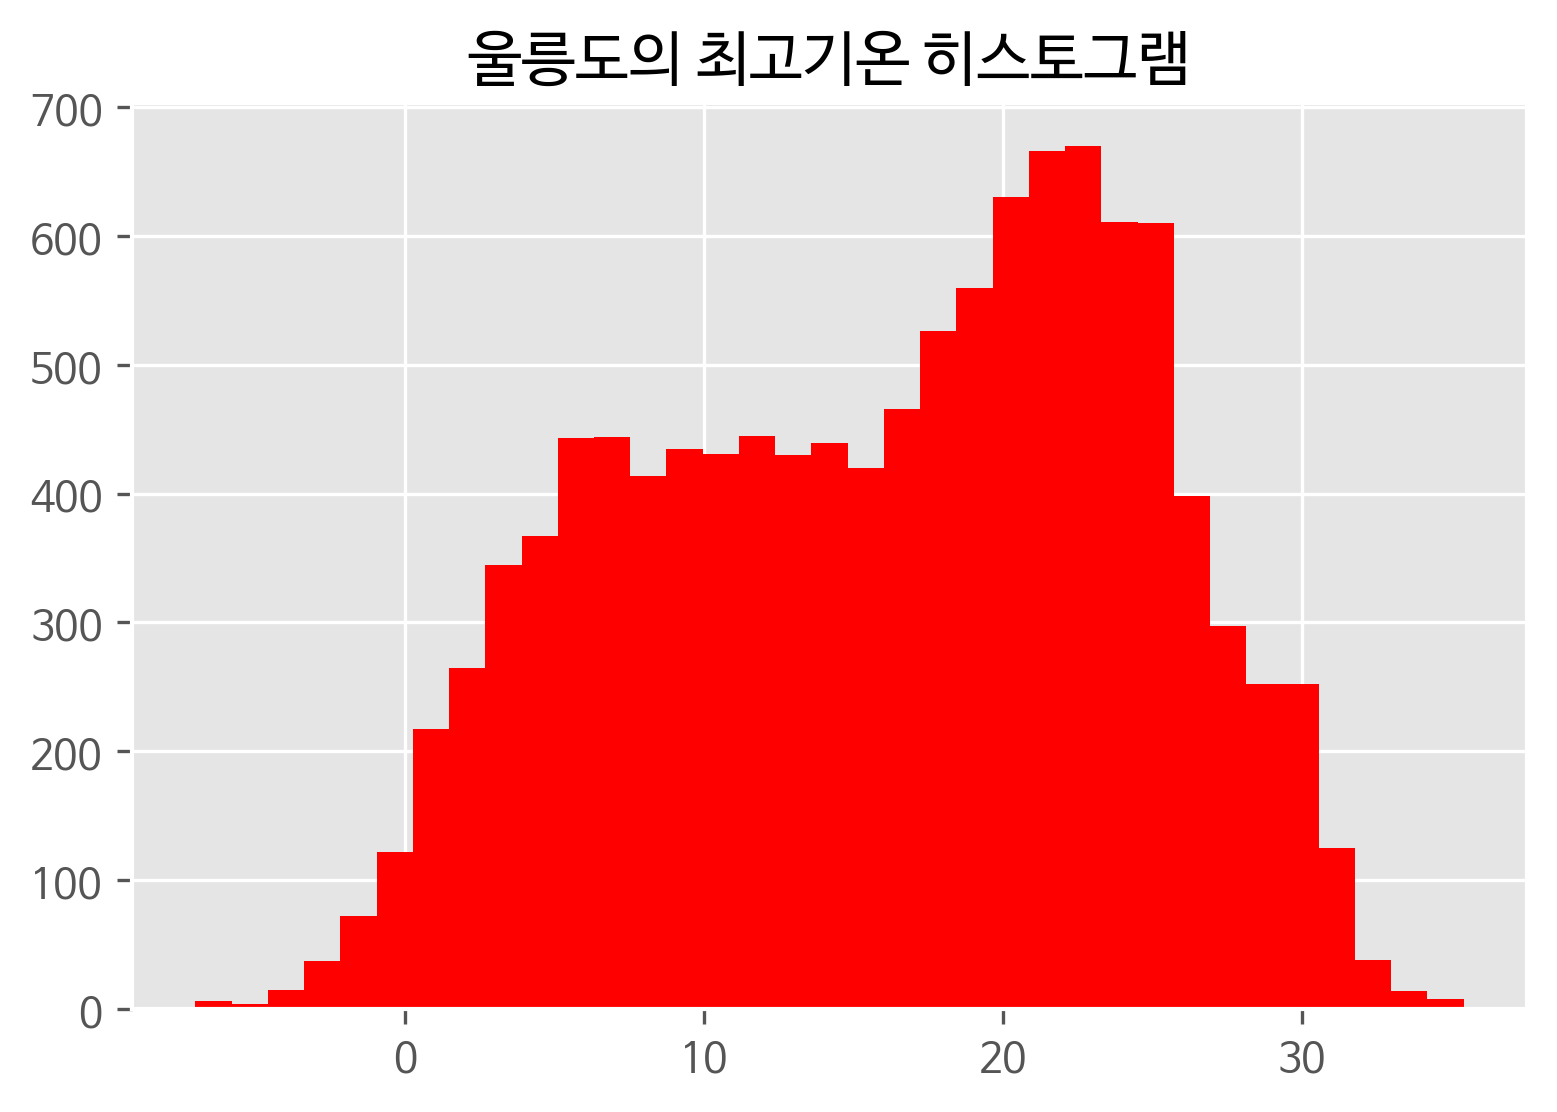

In [ ]:
import csv
import matplotlib.pyplot as plt

f = open("/content/ulleung.csv","r",encoding="cp949")
data = csv.reader(f)
next(data) # column명 자르고 dataset만 가져오기

maxTempList = []
for row in data :
  if row[-1] != "" :
    maxTempList.append(float(row[-1])) # maxTempList = [float(row[-1]) for row in data if row[-1] != ""]

f.close()

# 히스토그램 그리기
plt.figure(dpi=150)
plt.rc('font', family = 'NanumBarunGothic') # 나눔 바른 고딕을 기본 글꼴로 설정 -> 한글 깨짐 처리
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지
plt.hist(maxTempList, bins=35, color='r')
plt.title("울릉도의 최고기온 히스토그램")
plt.show()

1-2) 울릉도의 최저기온 히스토그램

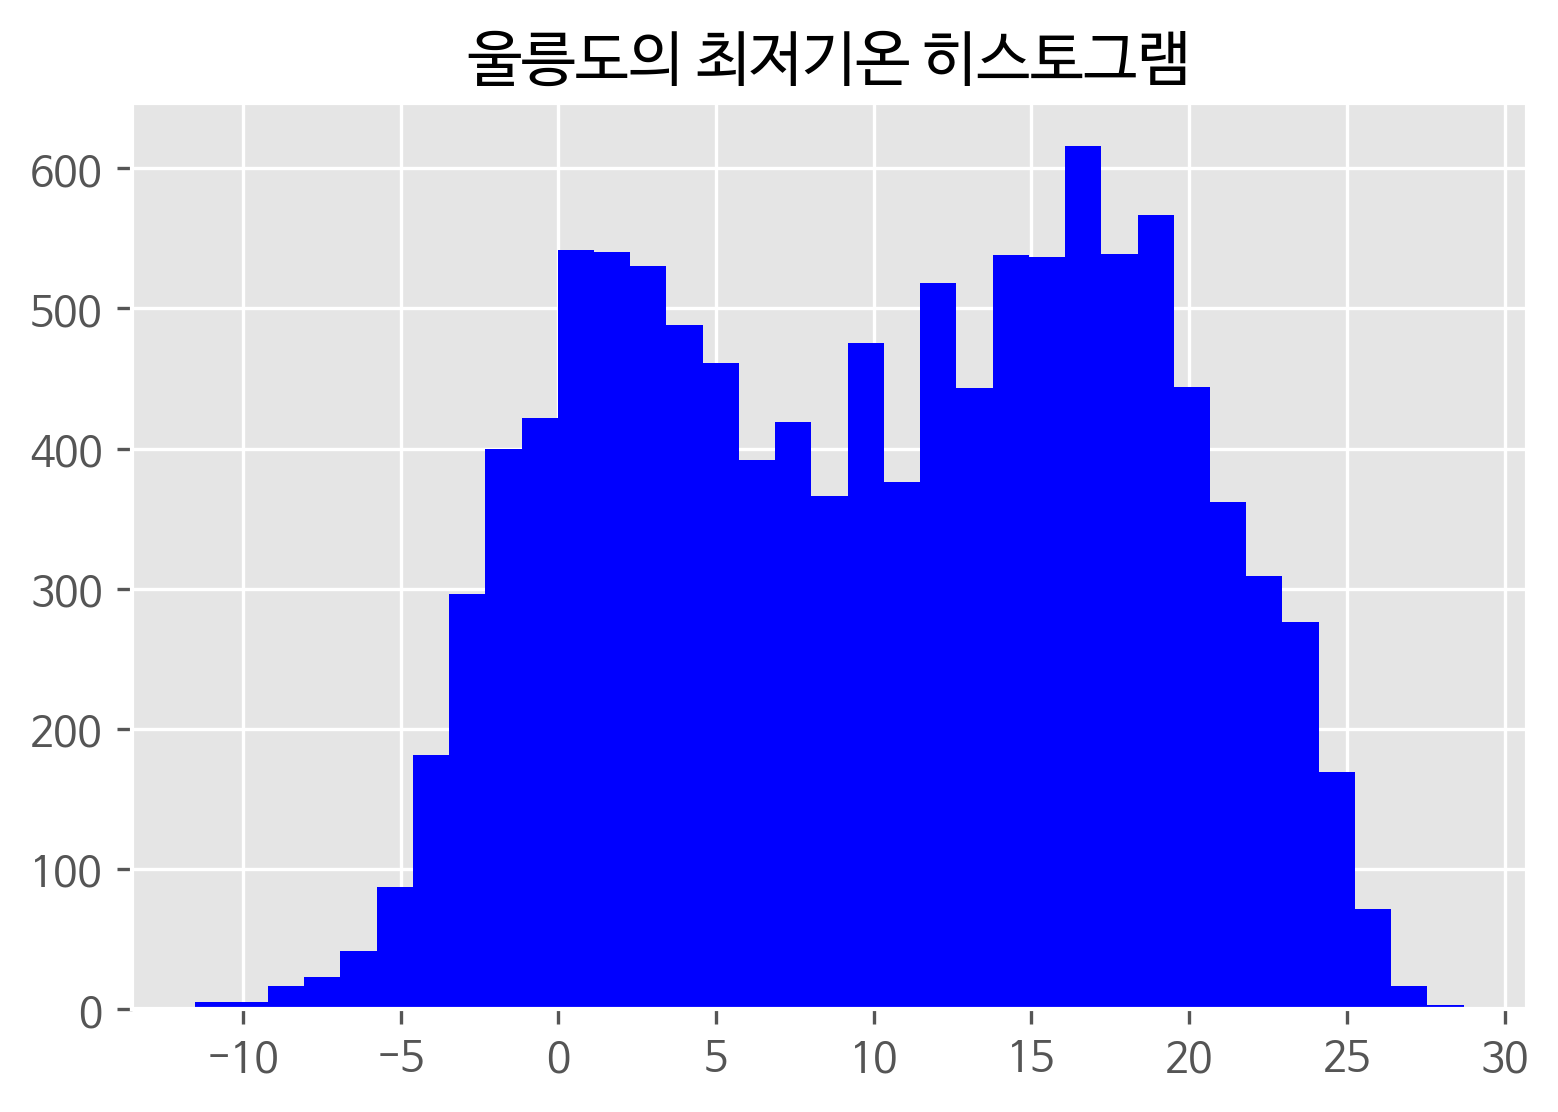

In [ ]:
import csv
import matplotlib.pyplot as plt

f = open("/content/ulleung.csv","r",encoding="cp949")
data = csv.reader(f)
next(data)

# minTempList = []
# for row in data :
#   if row[3] != "" :
#     minTempList.append(float(row[3]))
minTempList = [float(row[3]) for row in data if row[3] != ""]

f.close()

# 히스토그램 그리기
plt.figure(dpi=150)
plt.rc('font', family = 'NanumBarunGothic') # 나눔 바른 고딕을 기본 글꼴로 설정 -> 한글 깨짐 처리
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지
plt.hist(minTempList, bins=35, color='b')
plt.title("울릉도의 최저기온 히스토그램")
plt.show()

1-3) 울릉도의 평균기온 히스토그램

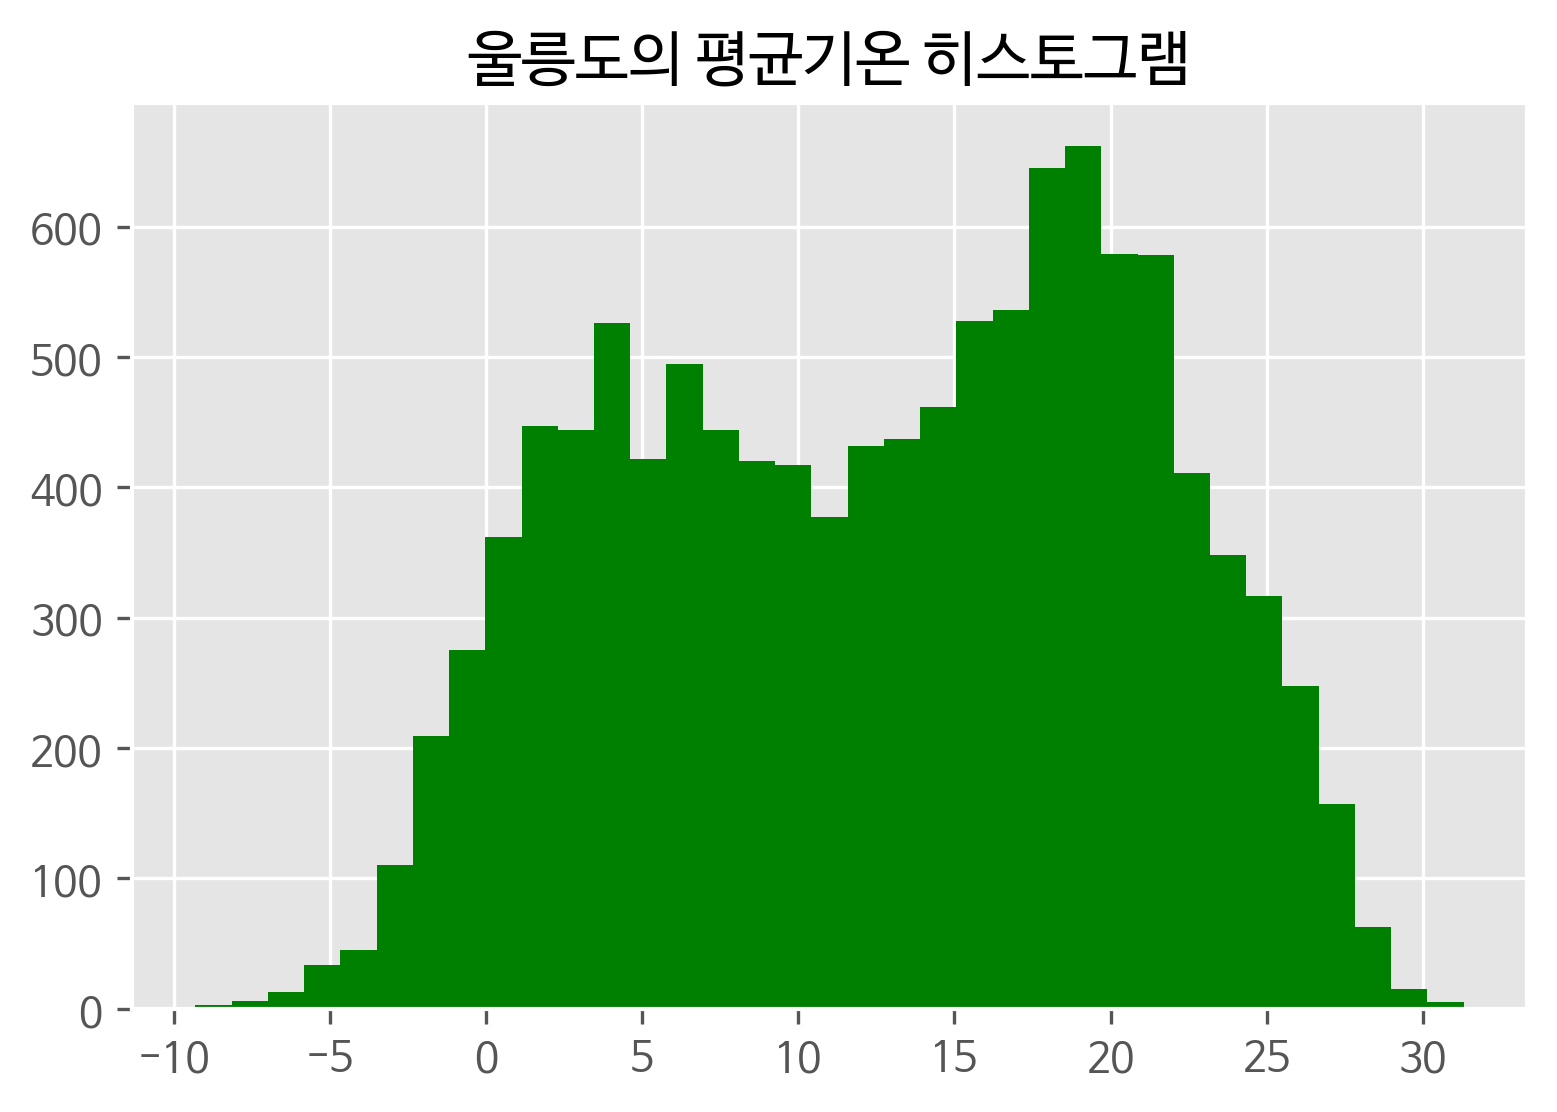

In [ ]:
import csv
import matplotlib.pyplot as plt

f = open("/content/ulleung.csv","r",encoding="cp949")
data = csv.reader(f)
next(data)

# avgTempList = []
# for row in data :
#   if row[3] != "" :
#     minTempList.append(float(row[3]))
avgTempList = [float(row[2]) for row in data if row[2] != ""]

f.close()

# 히스토그램 그리기
plt.figure(dpi=150)
plt.rc('font', family = 'NanumBarunGothic') # 나눔 바른 고딕을 기본 글꼴로 설정 -> 한글 깨짐 처리
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지
plt.hist(avgTempList, bins=35, color='g')
plt.title("울릉도의 평균기온 히스토그램")
plt.show()

2) 상자그림을 활용한 울릉도 최저 기온 vs 서울 최저 기온

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


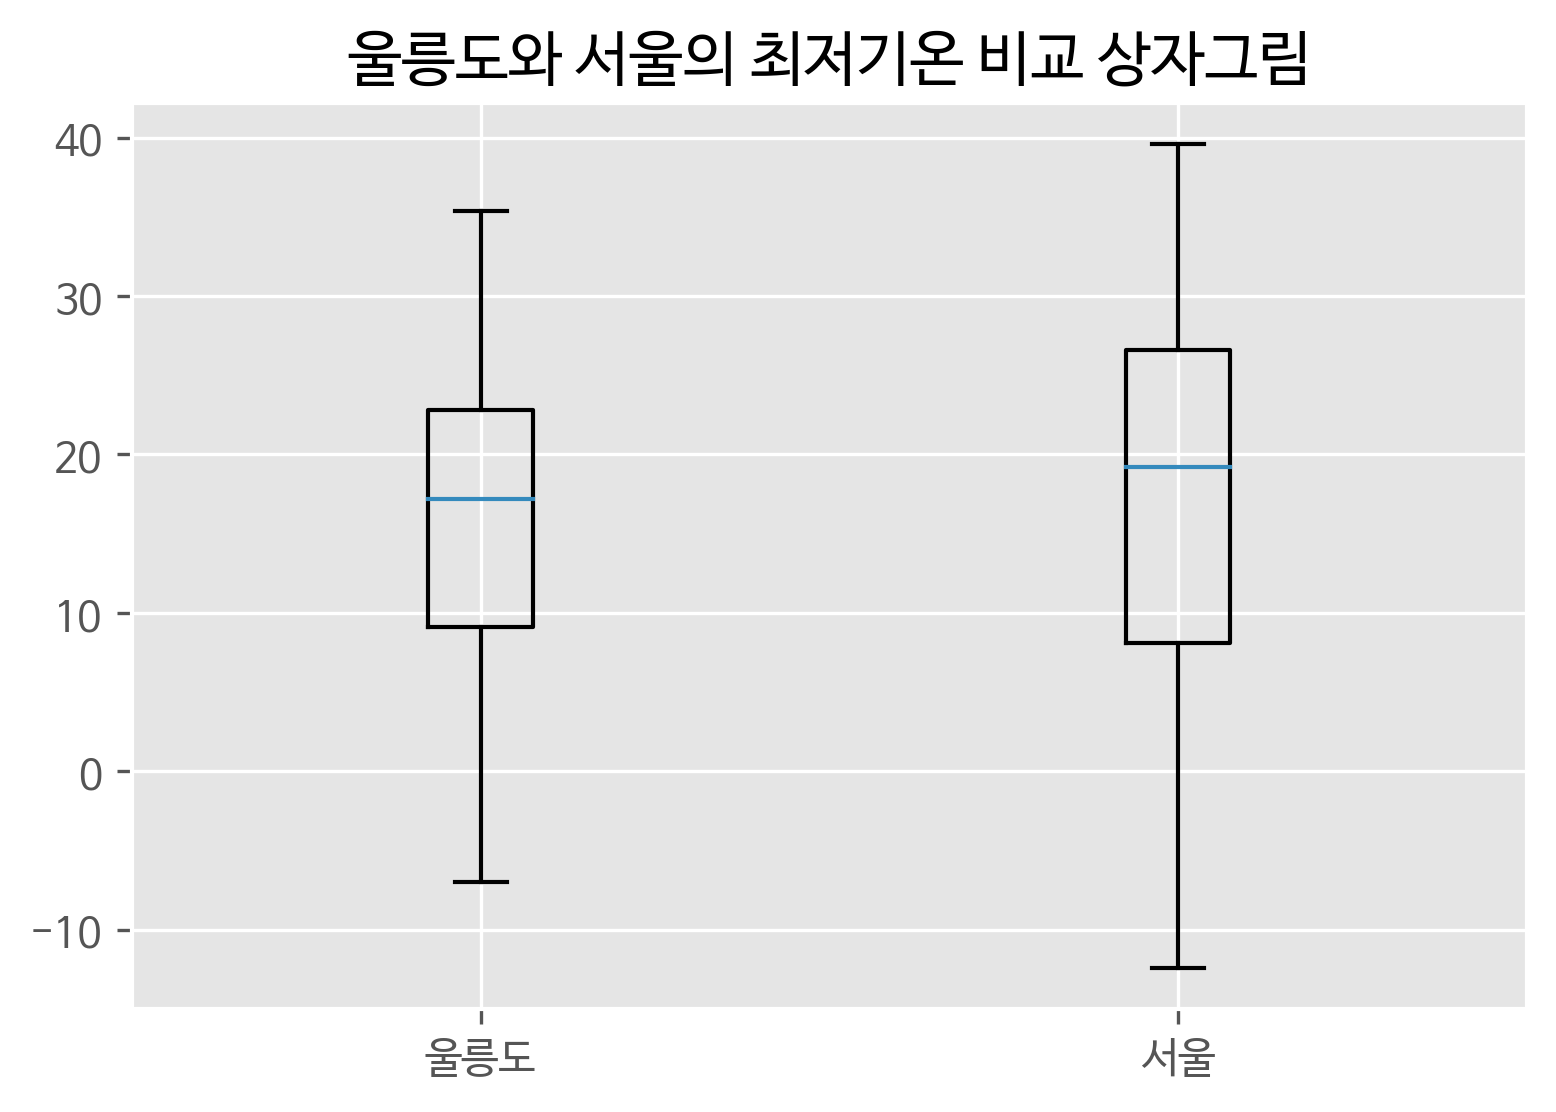

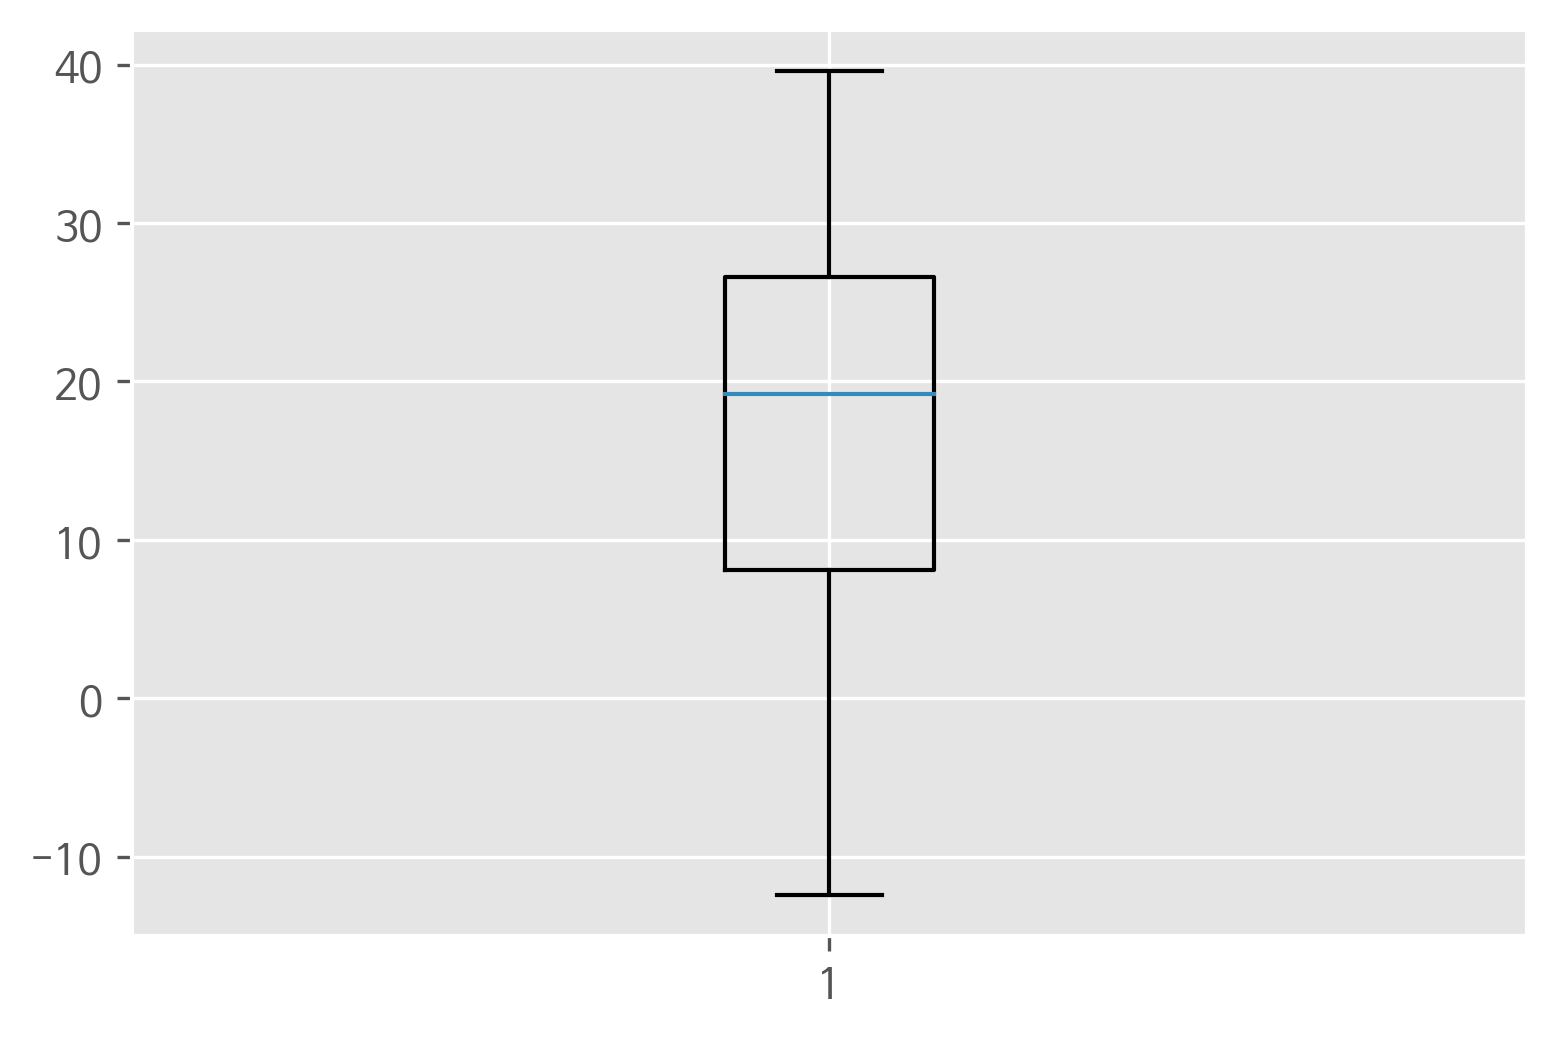

In [ ]:
# 울릉도의 최저 기온

import csv
import matplotlib.pyplot as plt

f1 = open("/content/ulleung.csv","r",encoding="cp949")
data1 = csv.reader(f1)
next(data1)

ulleungList = []
for row in data1 :
  if 2019 >= int(row[0].split('-')[0]) :
    if row[-1] != "" :
      ulleungList.append(float(row[-1]))
f1.close()

# 서울의 최저 기온

f2 = open("/content/seoul.csv", encoding="cp949")
data2 = csv.reader(f2)
next(data2) # 헤더

seoulList = [] # 서울의 최고 기온 데이터를 저장할 리스트 생성

for row in data2 :
  if 1990 <= int(row[0].split('-')[0]) :
    if row[-1] != "" :
      seoulList.append(float(row[-1]))
f2.close()

# 최저기온 상자그림
plt.style.use('ggplot') # 그래프 스타일 지정 (회색 배경의 격자무늬, 2/4 값을 의미하는 선의 색 변경)
plt.figure(dpi=150)
plt.rc('font', family = 'NanumBarunGothic') # 나눔 바른 고딕을 기본 글꼴로 설정 -> 한글 깨짐 처리
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지
plt.boxplot([ulleungList, seoulList], labels=["울릉도","서울"])
plt.title("울릉도와 서울의 최저기온 비교 상자그림")
plt.show()

3) 월별 최고기온 상자 그림 그리기

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


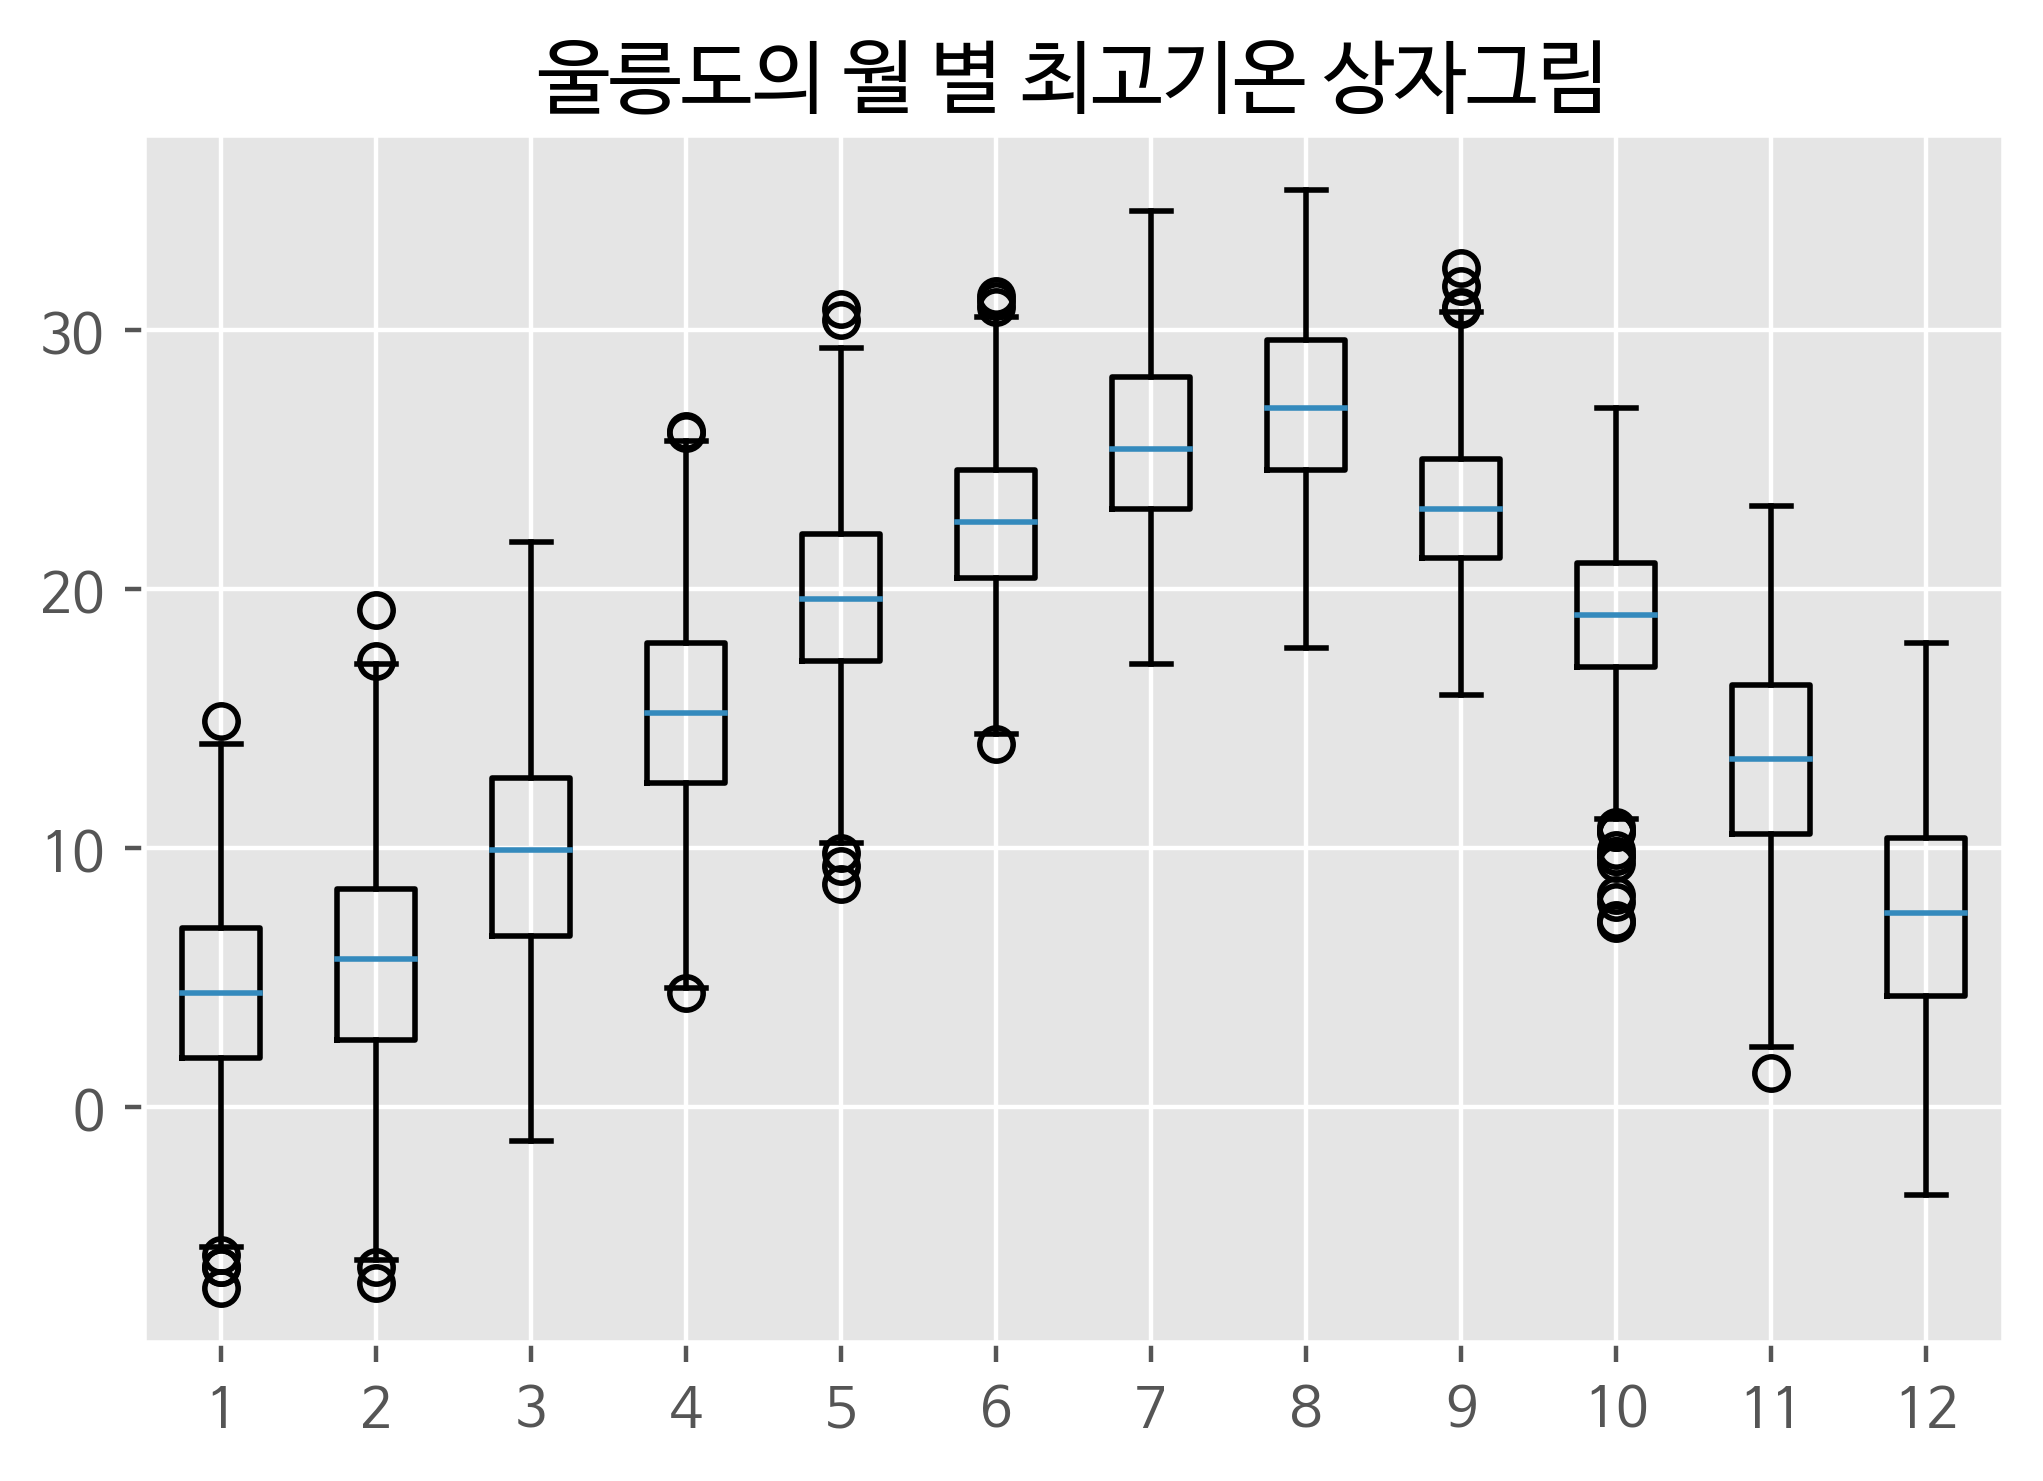

In [ ]:
import csv
import matplotlib.pyplot as plt

f = open("/content/ulleung.csv", encoding="cp949")
data = csv.reader(f)
next(data) # 헤더

# (월별)12개의 리스트가 담긴 리스트 만들기
month = []
for i in range(12) :
  month.append([])

# 월별 최고기온을 해당하는 리스트에 담기
for row in data :
  if row[-1] != "" :
    month[int(row[0].split('-')[1]) - 1].append(float(row[-1]))

# 월별 상자 그림 그리기
plt.style.use('ggplot') # 그래프 스타일 지정 (회색 배경의 격자무늬, 2/4 값을 의미하는 선의 색 변경)
plt.figure(dpi=200)
plt.rc('font', family = 'NanumBarunGothic') # 나눔 바른 고딕을 기본 글꼴로 설정 -> 한글 깨짐 처리
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지
plt.boxplot(month) # 아웃라이어(이상치) 값 생략하기 위해서 plt.boxplot(month, showfliers=False)
plt.title("울릉도의 월 별 최고기온 상자그림")
plt.show()

4) 특정 달의 일별 최고 기온 상자 그림 그리기

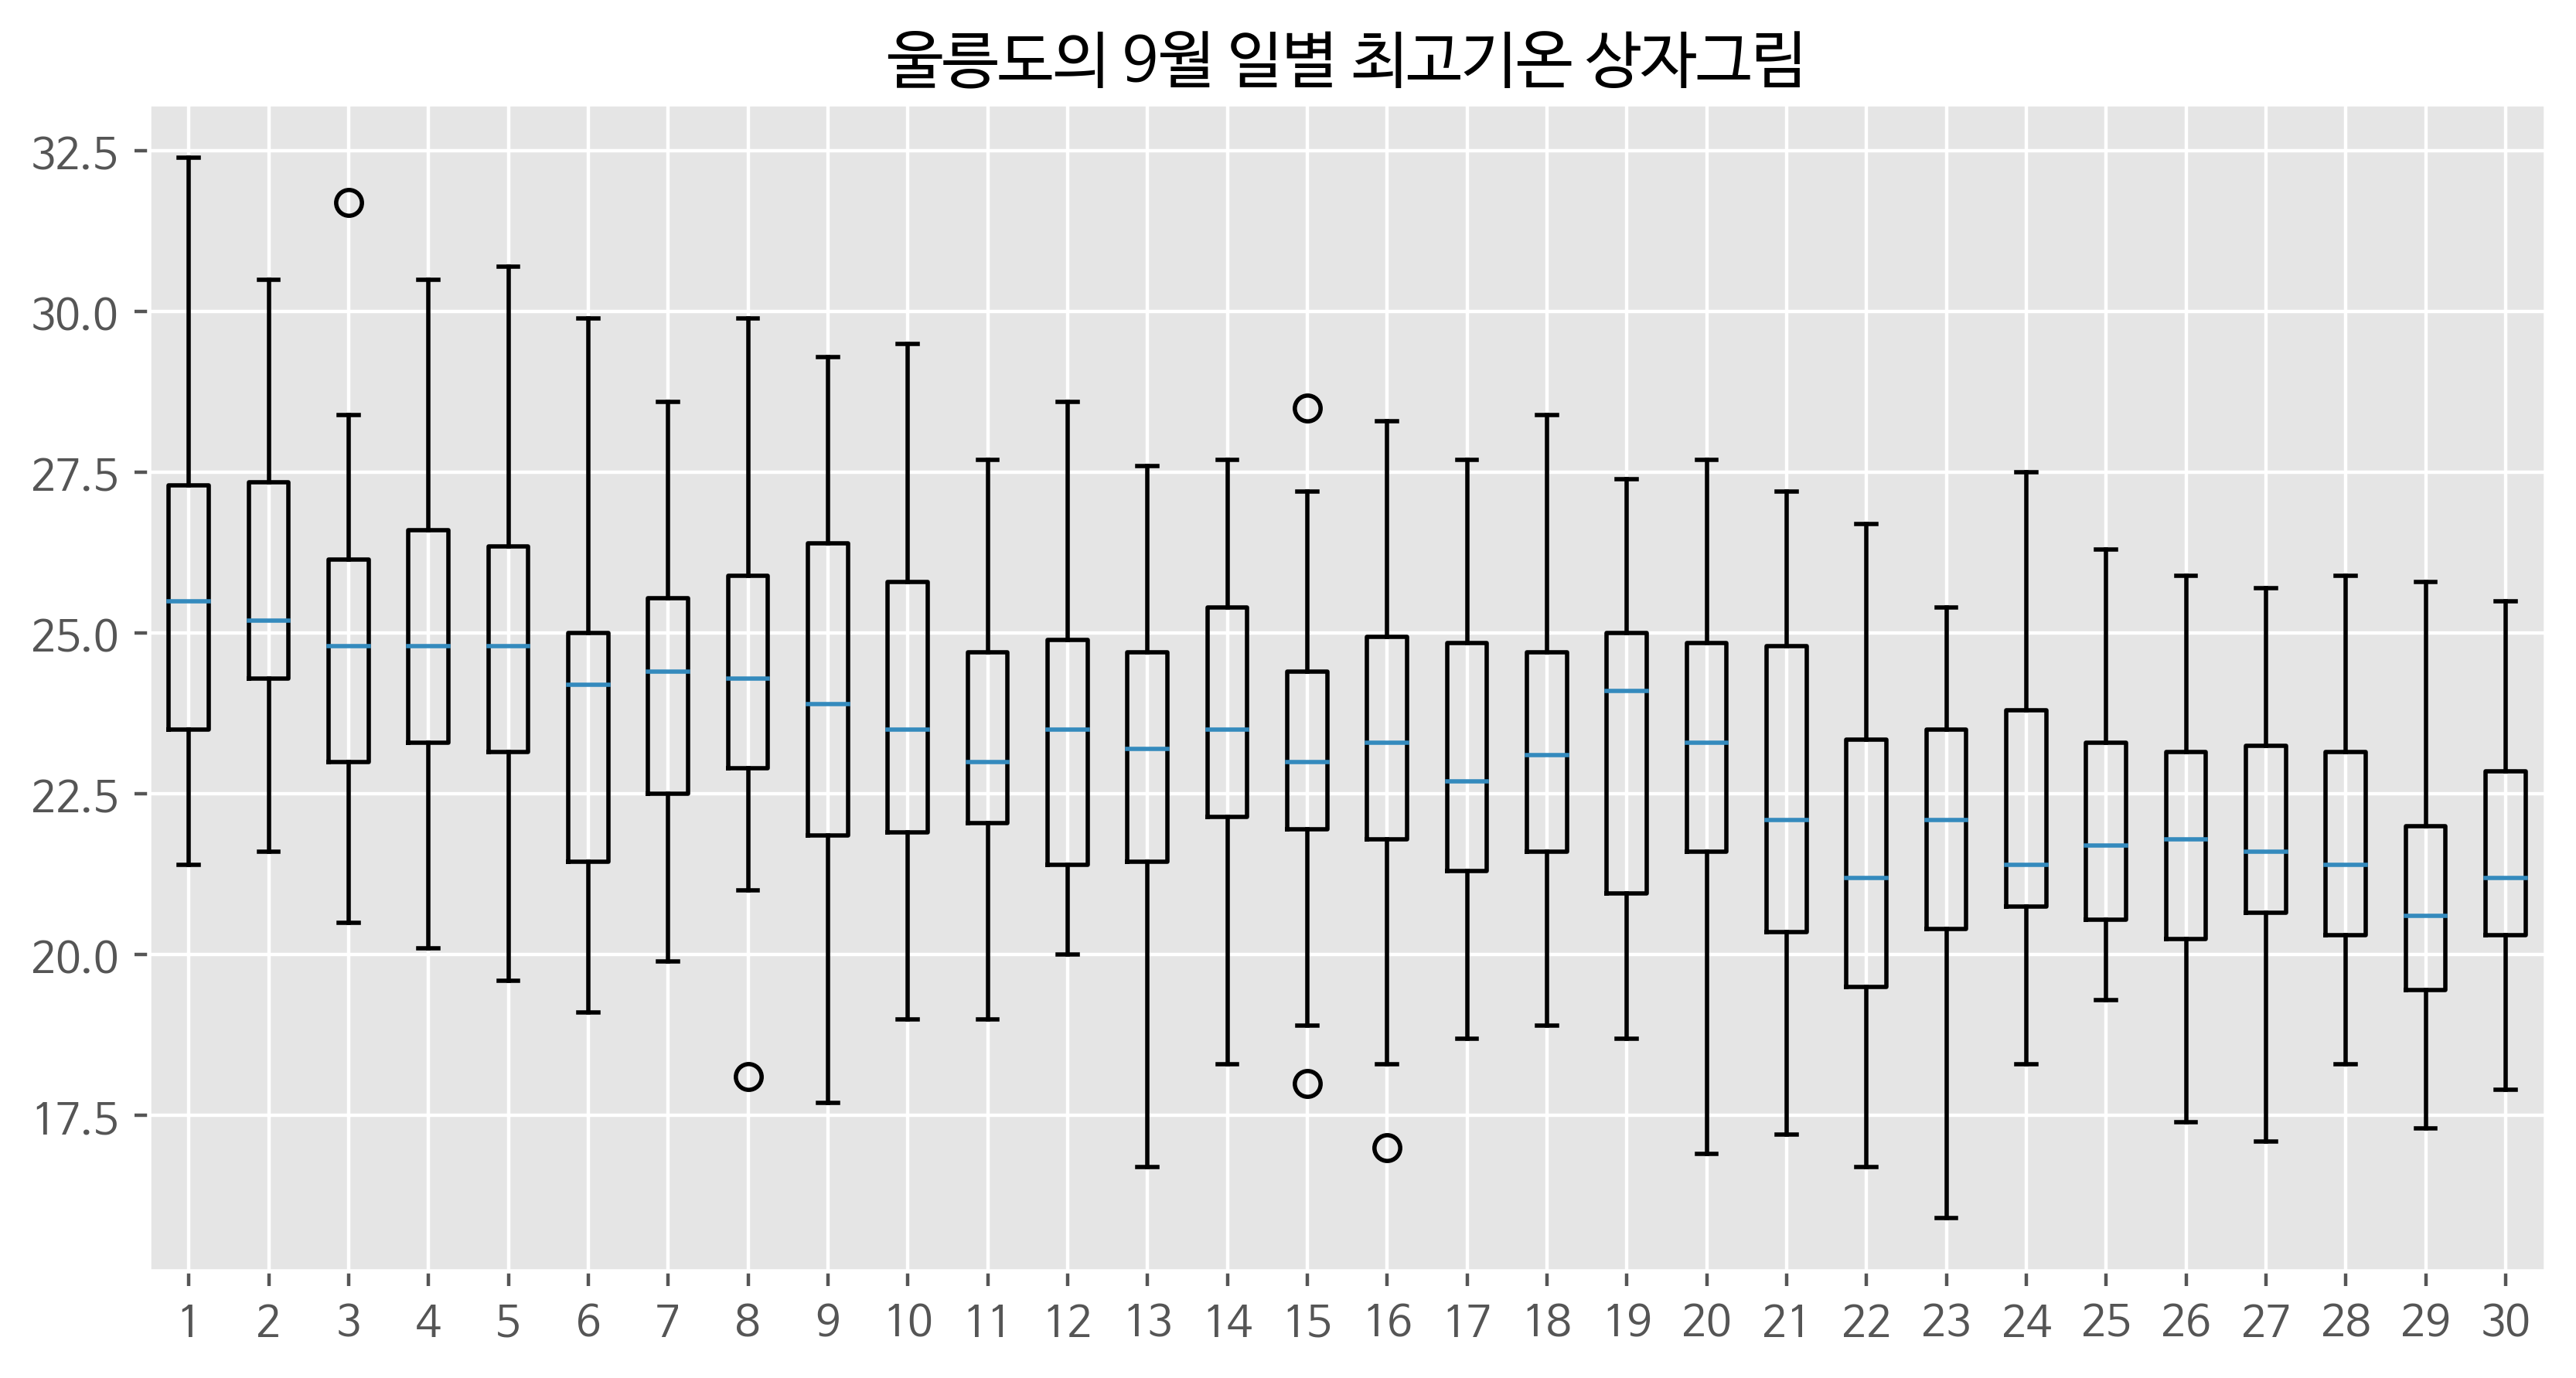

In [ ]:
import csv
import matplotlib.pyplot as plt

f = open("/content/ulleung.csv", encoding="cp949")
data = csv.reader(f)
next(data) # 헤더

# 일별 데이터 담기
day = []
for i in range(30) : # 오징어 제철이 7~11월이어서 그 중간인 9월로 잡고 9월이 30일이어서 range(30)으로 잡음
  day.append([])

# 
for row in data :
  if row[-1] != "" :
    if row[0].split('-')[1] == "09" :
      day[int(row[0].split('-')[2]) - 1].append(float(row[-1]))

# 일별 최고 기온 상자 그림
plt.style.use('ggplot') # 그래프 스타일 지정 (회색 배경의 격자무늬, 2/4 값을 의미하는 선의 색 변경)
plt.figure(figsize=(10,5), dpi=200)
plt.rc('font', family = 'NanumBarunGothic') # 나눔 바른 고딕을 기본 글꼴로 설정 -> 한글 깨짐 처리
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지
plt.boxplot(day) # 아웃라이어(이상치) 값 생략하기 위해서 plt.boxplot(day, showfliers=False)
plt.title("울릉도의 9월 일별 최고기온 상자그림")
plt.show()